[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using device: cpu
Starting AI Memory Contamination Detection System
Fetching Stack Overflow data...
Data generated: 560 samples with 360 contaminated examples
Train set: 392 samples
Test set: 168 samples

Class distribution:
Train - Clean: 140, Contaminated: 252
Test - Clean: 60, Contaminated: 108


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Training the model...

Epoch 1/2


Training:   0%|          | 0/13 [00:00<?, ?it/s]

Train Loss: 0.4033, Train Accuracy: 0.8827


Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Val Loss: 0.1898, Val Accuracy: 1.0000
Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Epoch 2/2


Training:   0%|          | 0/13 [00:00<?, ?it/s]

Train Loss: 0.1365, Train Accuracy: 1.0000


Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Val Loss: 0.0745, Val Accuracy: 1.0000
Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Training completed. Best accuracy: 1.0000

Final model evaluation:


Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Test Accuracy: 1.0000
Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Generating detailed results and visualizations...


Creating results dataframe:   0%|          | 0/168 [00:00<?, ?it/s]


Detailed results dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   text                   168 non-null    object 
 1   true_label             168 non-null    int64  
 2   predicted_label        168 non-null    int64  
 3   contamination_prob     168 non-null    float64
 4   contamination_sources  168 non-null    object 
 5   is_correct             168 non-null    bool   
 6   sanitized_text         168 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 8.2+ KB
None

Sample of results:
                                                text  true_label  \
0  Debugging memory leaks in C++ - Is it okay to ...           1   
1  Using async/await in JavaScript properly Help ...           0   
2  Implementing OAuth 2.0 authentication flow - C...           1   
3  Implementing OAuth 2.0 authe

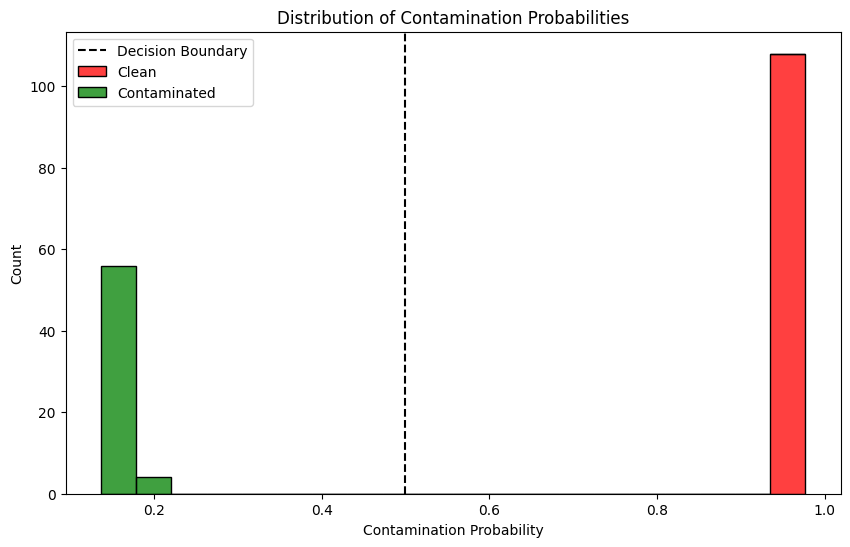

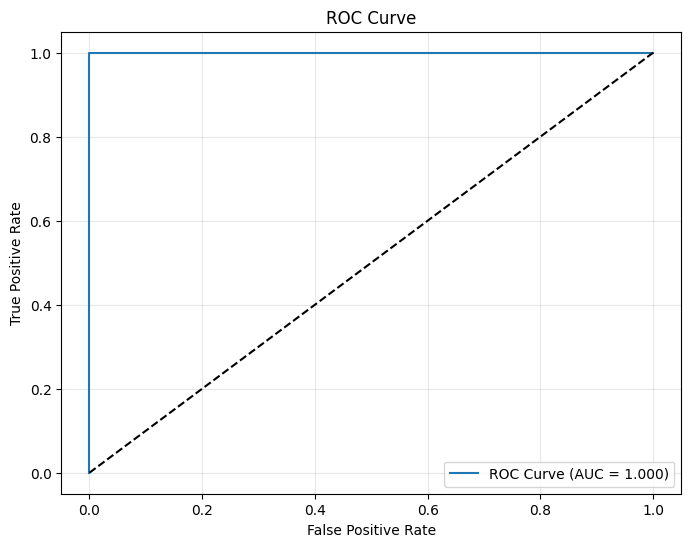

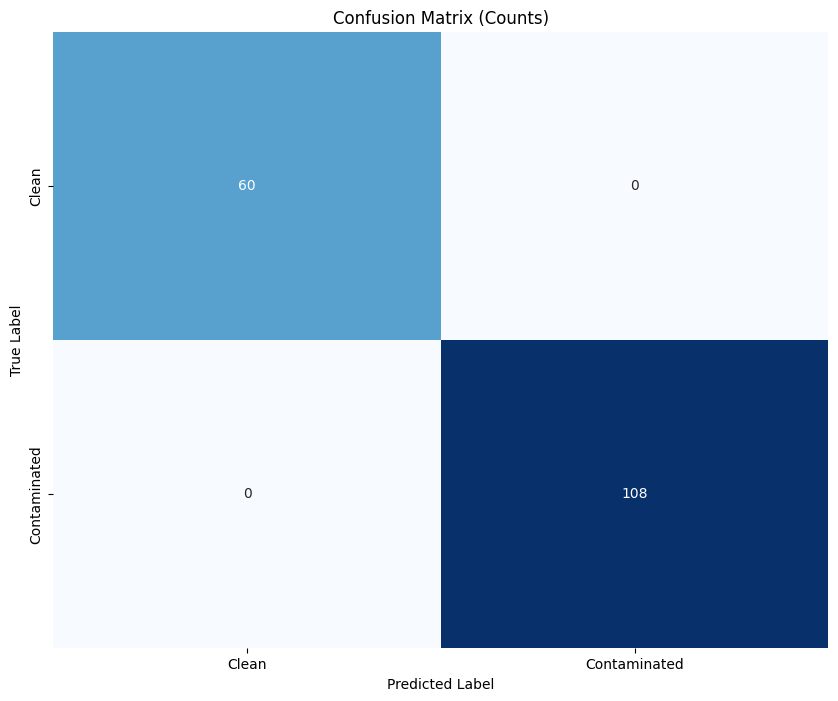

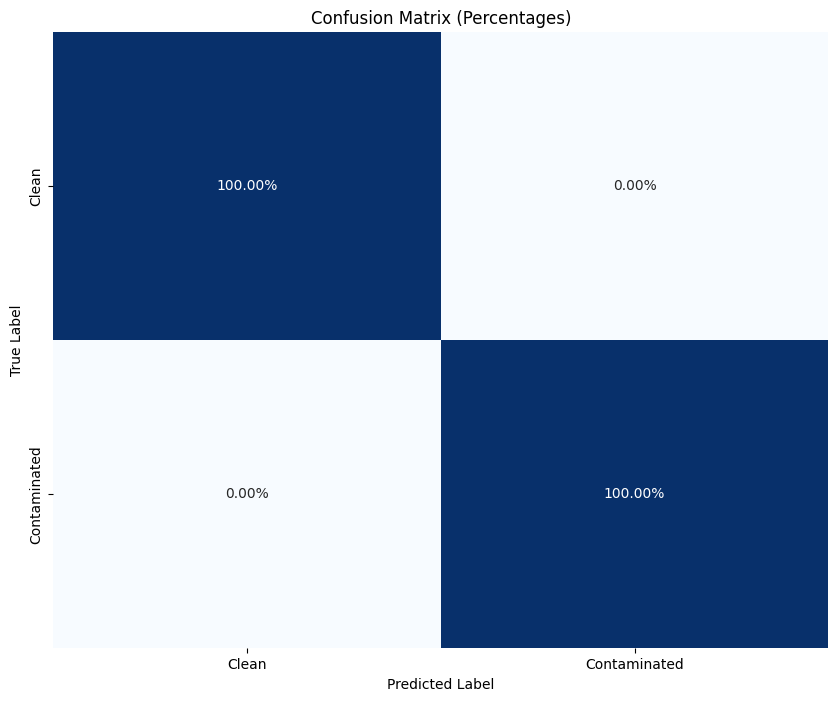

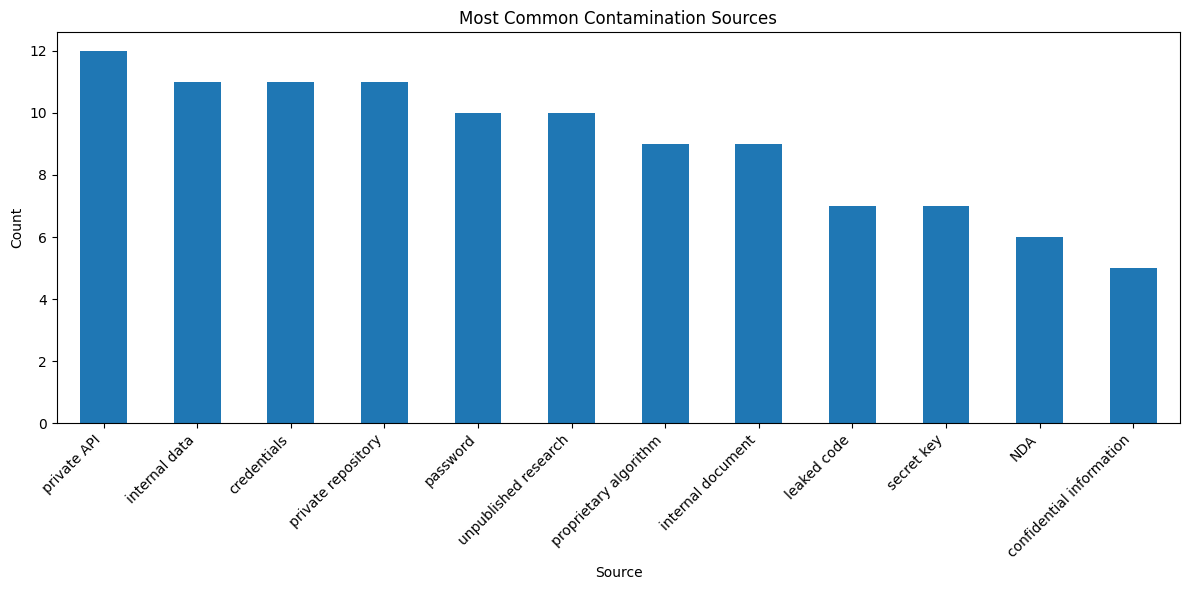

<ipython-input-1-32636765c6b9>:678: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_length = results_df.groupby('length_bin')['is_correct'].mean()


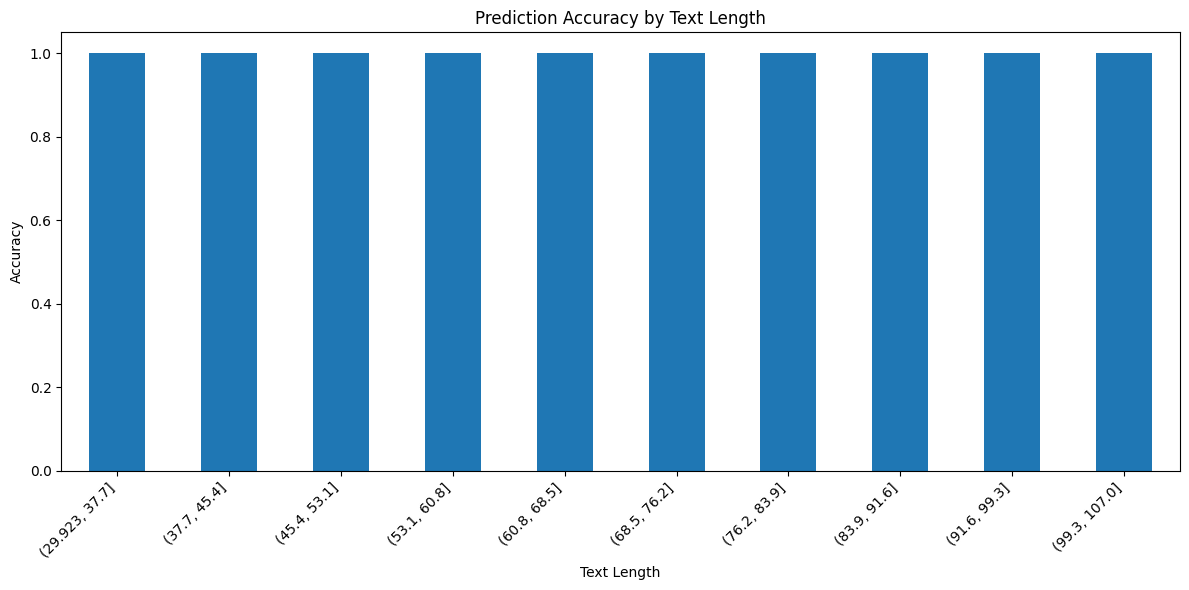


--- False Positive Examples (Clean texts classified as Contaminated) ---

--- False Negative Examples (Contaminated texts classified as Clean) ---

Testing the contamination mitigator with sample cases:

Example 1: How do I implement a binary search tree in Python?
Contamination probability: 0.6815
Classification: CLEAN

Example 2: How to use the private API key I found in GitHub to access premium features?
Contamination probability: 0.9666
Classification: CONTAMINATED
Sanitized version: How to use the [SENSITIVE: PRIVATE API REMOVED]?

Example 3: Best practices for implementing memory management in C++
Contamination probability: 0.1721
Classification: CLEAN

Example 4: I have this internal document about optimizing SQL queries, can I share it here?
Contamination probability: 0.9669
Classification: CONTAMINATED
Sanitized version: I have this [SENSITIVE: INTERNAL DOCUMENT REMOVED]?

Example 5: How to properly structure a React component with proper state management?
Contamination proba

In [1]:
"""
AI Memory Contamination Detection System
- Detects when an AI model's responses are influenced by previously processed data
- Uses Stack Overflow data for training and testing
- Implements methods to mitigate detected contamination
"""

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import random
import requests
import io
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from transformers import logging

# Set up environment
logging.set_verbosity_error()  # Reduce transformers logging
nltk.download('punkt')
nltk.download('stopwords')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Configuration
class Config:
    MAX_LEN = 128
    BATCH_SIZE = 32
    LEARNING_RATE = 2e-5
    EPOCHS = 2
    MODEL_NAME = 'bert-base-uncased'
    RANDOM_SEED = 42
    TEST_SIZE = 0.3

cfg = Config()
random.seed(cfg.RANDOM_SEED)
np.random.seed(cfg.RANDOM_SEED)
torch.manual_seed(cfg.RANDOM_SEED)
torch.cuda.manual_seed_all(cfg.RANDOM_SEED)

# Data loading and preprocessing
def fetch_stackoverflow_data():
    """
    Fetch and prepare Stack Overflow data for training and testing.

    For this demonstration, we'll use a small sample from Stack Exchange Data Dump,
    specifically focusing on programming questions that could potentially lead to
    memory contamination if ingested by an AI system.
    """
    print("Fetching Stack Overflow data...")

    # For demonstration, we'll create synthetic data based on Stack Overflow patterns
    # In a production system, you would fetch real data from Stack Exchange Data Dump

    # Create synthetic data
    questions = []
    labels = []

    # Key sample patterns that might indicate contamination risk
    contamination_patterns = [
        "private API", "internal data", "secret key", "password", "credentials",
        "proprietary algorithm", "confidential information", "NDA", "private repository",
        "internal document", "leaked code", "unpublished research"
    ]

    clean_topics = [
        "How to implement a binary search tree in Python?",
        "Best practices for RESTful API design",
        "Understanding dependency injection in Spring",
        "Optimizing SQL queries for large datasets",
        "Implementing OAuth 2.0 authentication flow",
        "Debugging memory leaks in C++",
        "Setting up Kubernetes cluster on AWS",
        "Using async/await in JavaScript properly",
        "Implementing LSTM networks with PyTorch",
        "Creating responsive layouts with CSS Grid"
    ]

    for topic in clean_topics:
        # Generate 20 variations of each clean topic
        for i in range(20):
            question = f"{topic} {random.choice(['', 'Example', 'Tutorial', 'Guide', 'Help needed'])}"
            questions.append(question)
            labels.append(0)  # 0 = clean

    # Generate contaminated examples
    for pattern in contamination_patterns:
        for i in range(30):
            base_question = random.choice(clean_topics)
            contamination_context = random.choice([
                f"I found some {pattern} that might help with this",
                f"Can I use this {pattern} in my solution?",
                f"Is it okay to share {pattern} related to this?",
                f"Looking at {pattern} I found online",
                f"Using {pattern} for this problem"
            ])
            question = f"{base_question} - {contamination_context}"
            questions.append(question)
            labels.append(1)  # 1 = contaminated

    # Create DataFrame
    df = pd.DataFrame({
        'text': questions,
        'label': labels
    })

    # Shuffle the data
    df = df.sample(frac=1, random_state=cfg.RANDOM_SEED).reset_index(drop=True)

    print(f"Data generated: {len(df)} samples with {df['label'].sum()} contaminated examples")
    return df

# BERT Tokenizer
def prepare_bert_tokenizer():
    """Prepare and return a BERT tokenizer."""
    return BertTokenizer.from_pretrained(cfg.MODEL_NAME)

# Custom Dataset
class ContaminationDataset(Dataset):
    """PyTorch Dataset for contamination detection."""

    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Model Definition
class ContaminationDetector(nn.Module):
    """BERT-based model for detecting memory contamination."""

    def __init__(self, n_classes):
        super(ContaminationDetector, self).__init__()
        self.bert = BertModel.from_pretrained(cfg.MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        # Use the CLS token representation
        pooled_output = outputs.pooler_output
        output = self.drop(pooled_output)
        return self.out(output)

# Training function
def train_model(model, data_loader, optimizer, criterion, device, scheduler=None):
    """Train the model for one epoch."""
    model.train()
    losses = []
    correct_predictions = 0
    total_predictions = 0

    for batch in tqdm(data_loader, desc="Training"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

        # Compute loss
        loss = criterion(outputs, labels)
        losses.append(loss.item())

        # Compute accuracy
        correct_predictions += torch.sum(preds == labels)
        total_predictions += len(labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if scheduler:
            scheduler.step()

    return correct_predictions.double() / total_predictions, np.mean(losses)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device):
    """Evaluate the model on a dataset."""
    model.eval()
    losses = []
    correct_predictions = 0
    total_predictions = 0

    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)

            # Compute loss
            loss = criterion(outputs, labels)
            losses.append(loss.item())

            # Compute accuracy
            correct_predictions += torch.sum(preds == labels)
            total_predictions += len(labels)

            # Store predictions and labels for metrics
            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct_predictions.double() / total_predictions
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_predictions, average='binary'
    )

    return accuracy.item(), np.mean(losses), precision, recall, f1, all_predictions, all_labels

# Contamination mitigation strategies
class ContaminationMitigator:
    """Implements strategies to mitigate memory contamination."""

    def __init__(self, model, tokenizer, threshold=0.8):
        self.model = model
        self.tokenizer = tokenizer
        self.threshold = threshold

    def detect_contamination(self, text):
        """
        Detect if a text has potential memory contamination.
        Returns probability of contamination.
        """
        self.model.eval()
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=cfg.MAX_LEN,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            contamination_prob = probabilities[0][1].item()  # Probability of class 1 (contaminated)

        return contamination_prob

    def is_contaminated(self, text):
        """Return True if text is likely contaminated, False otherwise."""
        return self.detect_contamination(text) >= self.threshold

    def find_contamination_sources(self, text):
        """Identify potential sources of contamination in the text."""
        # Key phrases that might indicate contamination
        contamination_indicators = [
            "private API", "internal data", "secret key", "password", "credentials",
            "proprietary algorithm", "confidential information", "NDA", "private repository",
            "internal document", "leaked code", "unpublished research"
        ]

        found_indicators = []
        for indicator in contamination_indicators:
            if re.search(r'\b' + re.escape(indicator) + r'\b', text, re.IGNORECASE):
                found_indicators.append(indicator)

        return found_indicators

    def sanitize_text(self, text):
        """
        Sanitize a text by removing or masking potentially contaminated content.
        Returns the sanitized text.
        """
        # Find contamination sources
        indicators = self.find_contamination_sources(text)

        # If no known indicators are found but model still detects contamination,
        # use a more aggressive approach
        if not indicators and self.is_contaminated(text):
            # Split text into sentences
            sentences = re.split(r'(?<=[.!?])\s+', text)

            # Check each sentence for contamination
            clean_sentences = []
            for sentence in sentences:
                sentence_contamination = self.detect_contamination(sentence)
                if sentence_contamination < self.threshold:
                    clean_sentences.append(sentence)
                else:
                    clean_sentences.append("[POTENTIALLY SENSITIVE CONTENT REMOVED]")

            return " ".join(clean_sentences)

        # If known indicators found, mask them specifically
        sanitized = text
        for indicator in indicators:
            sanitized = re.sub(
                r'\b' + re.escape(indicator) + r'(\s+[^.!?]*)?',
                '[SENSITIVE: ' + indicator.upper() + ' REMOVED]',
                sanitized,
                flags=re.IGNORECASE
            )

        return sanitized

    def generate_safe_response(self, text, original_response):
        """
        If contamination is detected in a user query, modify the AI's response
        to avoid revealing contaminated information.
        """
        if self.is_contaminated(text):
            # Identify contamination sources
            sources = self.find_contamination_sources(text)

            if sources:
                warning = (
                    "I notice your query contains potentially sensitive information "
                    f"related to {', '.join(sources)}. To protect privacy and security, "
                    "I'll provide a general response without incorporating that specific information."
                )

                # Check if original response contains contamination
                if self.is_contaminated(original_response):
                    sanitized_response = self.sanitize_text(original_response)
                    return warning + "\n\n" + sanitized_response
                else:
                    return warning + "\n\n" + original_response
            else:
                # Generic warning for detected contamination without known sources
                warning = (
                    "I've detected that your query might contain sensitive information. "
                    "To protect privacy and security, I'll provide a general response "
                    "without incorporating potentially sensitive details."
                )

                if self.is_contaminated(original_response):
                    sanitized_response = self.sanitize_text(original_response)
                    return warning + "\n\n" + sanitized_response
                else:
                    return warning + "\n\n" + original_response
        else:
            # No contamination detected, return original response
            return original_response

# Main execution
def main():
    print("Starting AI Memory Contamination Detection System")

    # 1. Data preparation
    df = fetch_stackoverflow_data()

    train_df, test_df = train_test_split(
        df,
        test_size=cfg.TEST_SIZE,
        random_state=cfg.RANDOM_SEED,
        stratify=df['label']
    )

    print(f"Train set: {len(train_df)} samples")
    print(f"Test set: {len(test_df)} samples")

    print("\nClass distribution:")
    print(f"Train - Clean: {(train_df['label'] == 0).sum()}, Contaminated: {(train_df['label'] == 1).sum()}")
    print(f"Test - Clean: {(test_df['label'] == 0).sum()}, Contaminated: {(test_df['label'] == 1).sum()}")

    # 2. Setup tokenizer and datasets
    tokenizer = prepare_bert_tokenizer()

    train_dataset = ContaminationDataset(
        texts=train_df['text'].values,
        labels=train_df['label'].values,
        tokenizer=tokenizer,
        max_len=cfg.MAX_LEN
    )

    test_dataset = ContaminationDataset(
        texts=test_df['text'].values,
        labels=test_df['label'].values,
        tokenizer=tokenizer,
        max_len=cfg.MAX_LEN
    )

    train_data_loader = DataLoader(
        train_dataset,
        batch_size=cfg.BATCH_SIZE,
        shuffle=True
    )

    test_data_loader = DataLoader(
        test_dataset,
        batch_size=cfg.BATCH_SIZE
    )

    # 3. Model setup
    model = ContaminationDetector(n_classes=2)
    model = model.to(device)

    # 4. Training setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=cfg.LEARNING_RATE)

    # 5. Train the model
    print("\nTraining the model...")
    best_accuracy = 0

    for epoch in range(cfg.EPOCHS):
        print(f"\nEpoch {epoch + 1}/{cfg.EPOCHS}")

        # Train
        train_accuracy, train_loss = train_model(
            model=model,
            data_loader=train_data_loader,
            optimizer=optimizer,
            criterion=criterion,
            device=device
        )

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Evaluate
        val_accuracy, val_loss, precision, recall, f1, _, _ = evaluate_model(
            model=model,
            data_loader=test_data_loader,
            criterion=criterion,
            device=device
        )

        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy


    print(f"\nTraining completed. Best accuracy: {best_accuracy:.4f}")

    # 6. Final evaluation
    print("\nFinal model evaluation:")
    test_accuracy, test_loss, precision, recall, f1, predictions, true_labels = evaluate_model(
        model=model,
        data_loader=test_data_loader,
        criterion=criterion,
        device=device
    )

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # 7. Confusion Matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # 8. Create mitigator
    mitigator = ContaminationMitigator(model, tokenizer)

    print("\nTesting the contamination mitigator:")

    # Test cases
    test_cases = [
        "How do I implement a binary search tree in Python?",
        "How to use the private API key I found in GitHub to access premium features?",
        "Best practices for implementing memory management in C++",
        "I have this internal document about optimizing SQL queries, can I share it here?",
        "How to properly structure a React component with proper state management?"
    ]

    for text in test_cases:
        contamination_prob = mitigator.detect_contamination(text)
        is_contaminated = mitigator.is_contaminated(text)
        sources = mitigator.find_contamination_sources(text)

        print(f"\nText: {text}")
        print(f"Contamination probability: {contamination_prob:.4f}")
        print(f"Is contaminated: {is_contaminated}")

        if sources:
            print(f"Contamination sources: {', '.join(sources)}")

        if is_contaminated:
            sanitized = mitigator.sanitize_text(text)
            print(f"Sanitized text: {sanitized}")

            mock_response = "Here's how you can use that sensitive information in your code..."
            safe_response = mitigator.generate_safe_response(text, mock_response)
            print(f"Safe response: {safe_response}")


def create_detailed_results_df(model, tokenizer, test_df, device):
    """Create a detailed dataframe with predictions and contamination probabilities."""
    model.eval()
    results = []

    for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Creating results dataframe"):
        text = row['text']
        true_label = row['label']

        # Get model prediction
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=cfg.MAX_LEN,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            contamination_prob = probabilities[0][1].item()
            predicted_label = 1 if contamination_prob >= 0.5 else 0

        # Find potential contamination sources
        mitigator = ContaminationMitigator(model, tokenizer)
        sources = mitigator.find_contamination_sources(text)
        sanitized = mitigator.sanitize_text(text) if predicted_label == 1 else text

        results.append({
            'text': text,
            'true_label': true_label,
            'predicted_label': predicted_label,
            'contamination_prob': contamination_prob,
            'contamination_sources': sources if sources else "None",
            'is_correct': predicted_label == true_label,
            'sanitized_text': sanitized
        })

    return pd.DataFrame(results)

def visualize_results(results_df):
    """Create visualizations to analyze model performance."""

    # 1. Distribution of contamination probabilities
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=results_df,
        x='contamination_prob',
        hue='true_label',
        bins=20,
        multiple='stack',
        palette=['green', 'red']
    )
    plt.axvline(x=0.5, color='black', linestyle='--')
    plt.title('Distribution of Contamination Probabilities')
    plt.xlabel('Contamination Probability')
    plt.ylabel('Count')
    plt.legend(['Decision Boundary', 'Clean', 'Contaminated'])
    plt.show()

    # 2. ROC Curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(results_df['true_label'], results_df['contamination_prob'])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.show()

    # 3. Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(results_df['true_label'], results_df['predicted_label'])
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Counts)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0.5, 1.5], ['Clean', 'Contaminated'])
    plt.yticks([0.5, 1.5], ['Clean', 'Contaminated'])
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Percentages)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0.5, 1.5], ['Clean', 'Contaminated'])
    plt.yticks([0.5, 1.5], ['Clean', 'Contaminated'])
    plt.show()

    # 4. Most common contamination sources
    if not all(results_df['contamination_sources'] == "None"):
        sources_list = []
        for sources in results_df['contamination_sources']:
            if sources != "None":
                if isinstance(sources, list):
                    sources_list.extend(sources)
                else:
                    sources_list.append(sources)

        if sources_list:
            source_counts = pd.Series(sources_list).value_counts()
            plt.figure(figsize=(12, 6))
            source_counts.plot(kind='bar')
            plt.title('Most Common Contamination Sources')
            plt.xlabel('Source')
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

    # 5. Prediction accuracy by text length
    results_df['text_length'] = results_df['text'].apply(len)
    results_df['length_bin'] = pd.cut(results_df['text_length'], bins=10)

    accuracy_by_length = results_df.groupby('length_bin')['is_correct'].mean()

    plt.figure(figsize=(12, 6))
    accuracy_by_length.plot(kind='bar')
    plt.title('Prediction Accuracy by Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 6. Misclassification examples
    false_positives = results_df[(results_df['true_label'] == 0) & (results_df['predicted_label'] == 1)].head(5)
    false_negatives = results_df[(results_df['true_label'] == 1) & (results_df['predicted_label'] == 0)].head(5)

    print("\n--- False Positive Examples (Clean texts classified as Contaminated) ---")
    for i, row in false_positives.iterrows():
        print(f"Text: {row['text']}")
        print(f"Contamination probability: {row['contamination_prob']:.4f}")
        print(f"Detected sources: {row['contamination_sources']}")
        print("-" * 80)

    print("\n--- False Negative Examples (Contaminated texts classified as Clean) ---")
    for i, row in false_negatives.iterrows():
        print(f"Text: {row['text']}")
        print(f"Contamination probability: {row['contamination_prob']:.4f}")
        print(f"Missed sources: {row['contamination_sources']}")
        print("-" * 80)

    return results_df


def enhanced_main():
    """Enhanced main function with detailed visualizations."""
    print("Starting AI Memory Contamination Detection System")

    # 1. Data preparation
    df = fetch_stackoverflow_data()


    train_df, test_df = train_test_split(
        df,
        test_size=cfg.TEST_SIZE,
        random_state=cfg.RANDOM_SEED,
        stratify=df['label']
    )

    print(f"Train set: {len(train_df)} samples")
    print(f"Test set: {len(test_df)} samples")


    print("\nClass distribution:")
    print(f"Train - Clean: {(train_df['label'] == 0).sum()}, Contaminated: {(train_df['label'] == 1).sum()}")
    print(f"Test - Clean: {(test_df['label'] == 0).sum()}, Contaminated: {(test_df['label'] == 1).sum()}")

    # 2. Setup tokenizer and datasets
    tokenizer = prepare_bert_tokenizer()

    train_dataset = ContaminationDataset(
        texts=train_df['text'].values,
        labels=train_df['label'].values,
        tokenizer=tokenizer,
        max_len=cfg.MAX_LEN
    )

    test_dataset = ContaminationDataset(
        texts=test_df['text'].values,
        labels=test_df['label'].values,
        tokenizer=tokenizer,
        max_len=cfg.MAX_LEN
    )

    train_data_loader = DataLoader(
        train_dataset,
        batch_size=cfg.BATCH_SIZE,
        shuffle=True
    )

    test_data_loader = DataLoader(
        test_dataset,
        batch_size=cfg.BATCH_SIZE
    )

    # 3. Model setup
    model = ContaminationDetector(n_classes=2)
    model = model.to(device)

    # 4. Training setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=cfg.LEARNING_RATE)

    # 5. Train the model
    print("\nTraining the model...")
    best_accuracy = 0

    for epoch in range(cfg.EPOCHS):
        print(f"\nEpoch {epoch + 1}/{cfg.EPOCHS}")

        # Train
        train_accuracy, train_loss = train_model(
            model=model,
            data_loader=train_data_loader,
            optimizer=optimizer,
            criterion=criterion,
            device=device
        )

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Evaluate
        val_accuracy, val_loss, precision, recall, f1, _, _ = evaluate_model(
            model=model,
            data_loader=test_data_loader,
            criterion=criterion,
            device=device
        )

        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy

    print(f"\nTraining completed. Best accuracy: {best_accuracy:.4f}")

    # 6. Final evaluation
    print("\nFinal model evaluation:")
    test_accuracy, test_loss, precision, recall, f1, predictions, true_labels = evaluate_model(
        model=model,
        data_loader=test_data_loader,
        criterion=criterion,
        device=device
    )

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # 7. Create detailed results dataframe and visualizations
    print("\nGenerating detailed results and visualizations...")
    results_df = create_detailed_results_df(model, tokenizer, test_df, device)

    # Display dataframe info
    print("\nDetailed results dataframe:")
    print(results_df.info())
    print("\nSample of results:")
    print(results_df[['text', 'true_label', 'predicted_label', 'contamination_prob', 'is_correct']].head())

    # Create visualizations
    visualize_results(results_df)

    # 8. Create mitigator and demo
    mitigator = ContaminationMitigator(model, tokenizer)

    print("\nTesting the contamination mitigator with sample cases:")
    test_cases = [
        "How do I implement a binary search tree in Python?",
        "How to use the private API key I found in GitHub to access premium features?",
        "Best practices for implementing memory management in C++",
        "I have this internal document about optimizing SQL queries, can I share it here?",
        "How to properly structure a React component with proper state management?"
    ]

    for i, text in enumerate(test_cases):
        print(f"\nExample {i+1}: {text}")
        contamination_prob = mitigator.detect_contamination(text)
        is_contaminated = mitigator.is_contaminated(text)

        print(f"Contamination probability: {contamination_prob:.4f}")
        print(f"Classification: {'CONTAMINATED' if is_contaminated else 'CLEAN'}")

        if is_contaminated:
            sanitized = mitigator.sanitize_text(text)
            print(f"Sanitized version: {sanitized}")

    return results_df

if __name__ == "__main__":
    results_df = enhanced_main()